#Netflix Data Analysis

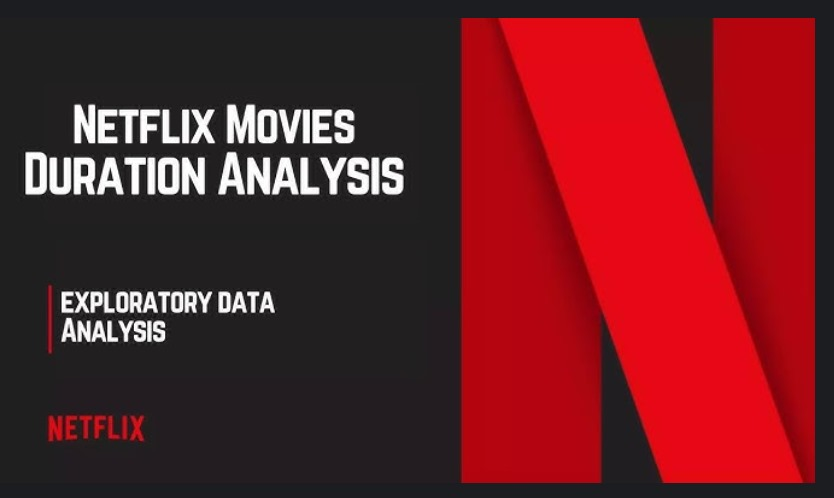

##**Hypothesis:**

* What was the most frequent movie duration in the 1990s? Save an approximate answer as an integer called duration.

* A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as short_movie_count.

* How many movies released in each year?

* The director who has directed the most movies in a country.

* What's the most common genre for movies and TV shows?

* Which countries have the highest movie production?

* Does time affect the duration of a movie?

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Reading a csv as a dataframe
df = pd.read_csv("/content/drive/MyDrive/Netflix Data Analysis/netflix_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies
4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas
4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
4810,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
4811,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas


In [ ]:
df["duration"].mode()

,duration
0,93


In [ ]:
ninety_df = df[(df["release_year"] == 1990) & (df['release_year'] < 2000)]
ninety_df


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
240,s344,Movie,Agneepath,Mukul Anand,"Amitabh Bachchan, Mithun Chakraborty, Danny De...",India,"April 1, 2020",1990,174,A boy grows up to become a gangster in pursuit...,Dramas
1116,s1757,Movie,Dil,Indra Kumar,"Aamir Khan, Madhuri Dixit, Saeed Jaffrey, Deve...",India,"October 12, 2020",1990,165,A miser’s scheme to set his son up with a mill...,Comedies
1281,s2026,Movie,"Escape from the ""Liberty"" Cinema",Wojciech Marczewski,"Janusz Gajos, Zbigniew Zamachowski, Teresa Mar...",Poland,"October 1, 2019",1990,88,Artistic rebellion ignites at the movies when ...,Comedies
1504,s2394,Movie,Ghayal,Rajkumar Santoshi,"Sunny Deol, Meenakshi Sheshadri, Amrish Puri, ...",India,"December 31, 2019",1990,163,"Framed for his older brother's murder, a boxer...",Action
1569,s2494,Movie,GoodFellas,Martin Scorsese,"Robert De Niro, Ray Liotta, Joe Pesci, Lorrain...",United States,"January 1, 2021",1990,145,Former mobster Henry Hill recounts his colorfu...,Classic Movies
1852,s2963,Movie,In Defense of a Married Man,Joel Oliansky,"Judith Light, Michael Ontkean, Jerry Orbach, P...",United States,"October 1, 2011",1990,94,A lawyer's husband is having an affair. When h...,Dramas
2110,s3335,TV Show,Ken Burns: The Civil War,Ken Burns,"Sam Waterston, Julie Harris, Jason Robards, Mo...",United States,"February 22, 2017",1990,1,Ken Burns's documentary depicts the action of ...,Docuseries
2328,s3718,Movie,"Look Out, Officer",Sze Yu Lau,"Stephen Chow, Bill Tung, Stanley Sui-Fan Fung,...",Hong Kong,"August 16, 2018",1990,88,An officer killed on the job returns to Earth ...,Action
3135,s5043,Movie,Quigley Down Under,Simon Wincer,"Tom Selleck, Laura San Giacomo, Alan Rickman, ...",Australia,"December 1, 2020",1990,120,"After traveling to Australia for a job, a shar...",Action
3263,s5250,Movie,Rocky V,John G. Avildsen,"Sylvester Stallone, Talia Shire, Burt Young, R...",United States,"August 1, 2019",1990,104,"Inspired by the memory of his trainer, a broke...",Dramas


In [ ]:
duration = ninety_df["duration"].mode()[0]
duration

88

**The most frequent movie duration in the 1990's is 88 minutes**

In [ ]:
short_movies_count = ninety_df[(ninety_df["genre"] == 'Action') & (ninety_df["duration"] < 90)]
short_movies_count

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
2328,s3718,Movie,"Look Out, Officer",Sze Yu Lau,"Stephen Chow, Bill Tung, Stanley Sui-Fan Fung,...",Hong Kong,"August 16, 2018",1990,88,An officer killed on the job returns to Earth ...,Action


# Number of movies released in each year

In [ ]:
movies_made_in_a_year = df["release_year"].value_counts()
movies_made_in_a_year

,count
release_year,
2017,646
2018,624
2016,562
2019,488
2020,379
...,...
1964,1
1963,1
1946,1


In [ ]:
most_movies_made = df["release_year"].mode()[0]
most_movies_made

2017

Text(0.5, 0, 'Years')

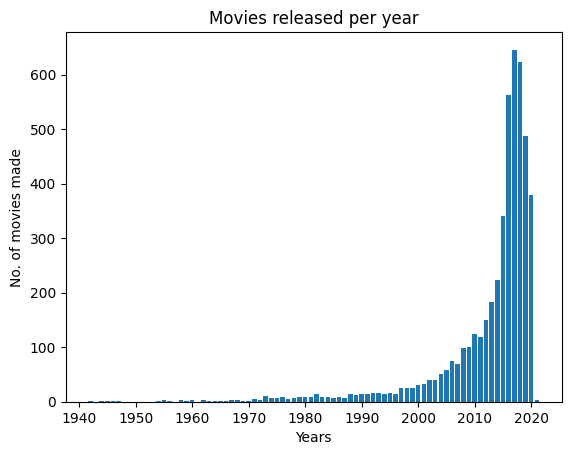

In [69]:
plt.bar(movies_released_per_year.index, movies_released_per_year.values)
plt.title("Movies released per year")
plt.ylabel("No. of movies made")
plt.xlabel("Years")

#**Top directors in a country**

In [ ]:
top_directors_by_country = df.loc[df.groupby('country')['director'].idxmax()].reset_index()
top_directors_by_country['director']

,director
0,Ticoy Rodriguez
1,Wayne Blair
2,Ulrike Kofler
3,"Nuhash Humayun, Syed Ahmed Shawki, Rahat Rahma..."
4,Wouter Bouvijn
...,...
67,"Àlex Pastor, David Pastor"
68,Álvaro Brechner
69,Matías Gueilburt
70,Van M. Pham


In [ ]:
top_directors_by_country['director'].nunique()

72

# **The most common genre**


In [ ]:
topg = df['genre'].value_counts()

Text(0.5, 0, 'No. of movies')

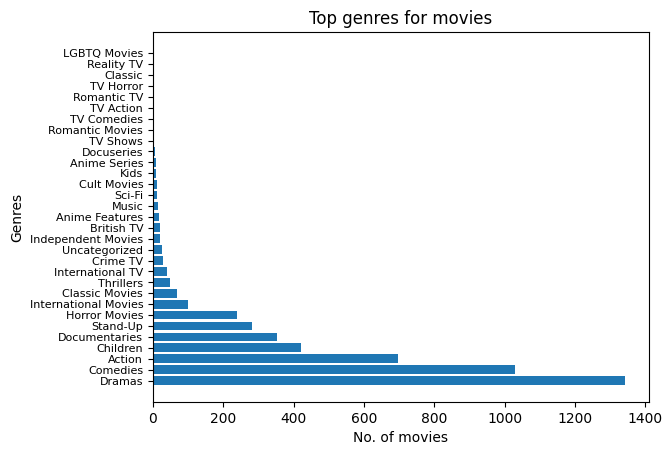

In [68]:
plt.barh(topg.index, topg.values)
plt.yticks(fontsize= 8)
plt.title("Top genres for movies")
plt.ylabel("Genres")
plt.xlabel("No. of movies")

#**Top 30 countries by total movie production**

In [63]:
most_movies_made_in_country = df["country"].value_counts().sort_values()
top_5 = most_movies_made_in_country.tail(30)
top_5

,count
country,
Netherlands,17
Chile,17
Ireland,17
United Arab,17
Taiwan,18
Pakistan,18
Poland,19
South Africa,29
Italy,38


Text(0.5, 0, 'No. of movies made')

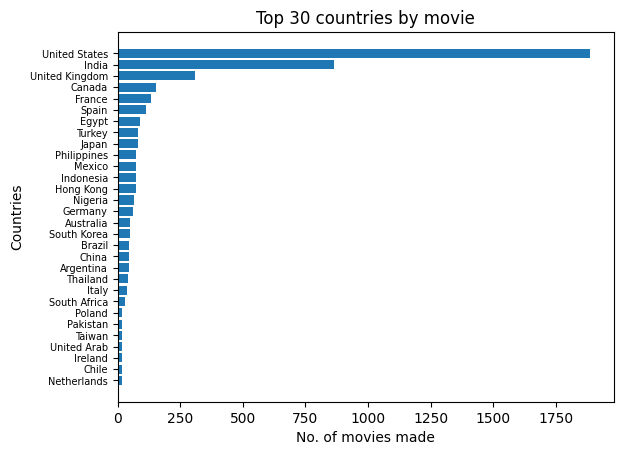

In [67]:
plt.barh(top_5.index, top_5.values)
plt.yticks(fontsize=7)
plt.title("Top 30 countries by movie")
plt.ylabel("Countries")
plt.xlabel("No. of movies made")

# **Q:** Does time affect the duration of a movie?


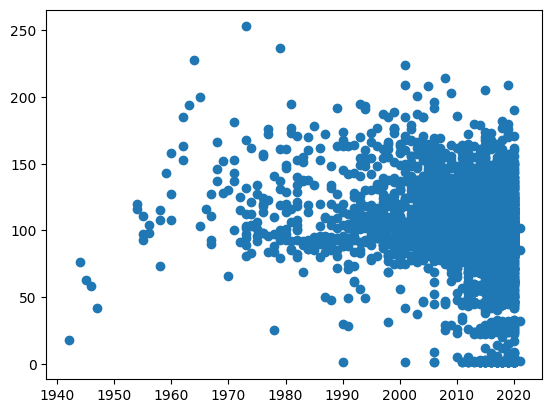

In [75]:
plt.scatter(df["release_year"], df["duration"])

# **Ans:** No. Time doesn't affect the duration of a movie made in it. It's random